   #### Group 5
   Aguanta, Jessel <br>
   Andam, Jhun Brian <br>
   Ramas, Juamalida <br>
   Yramis, Neil Steven <br>

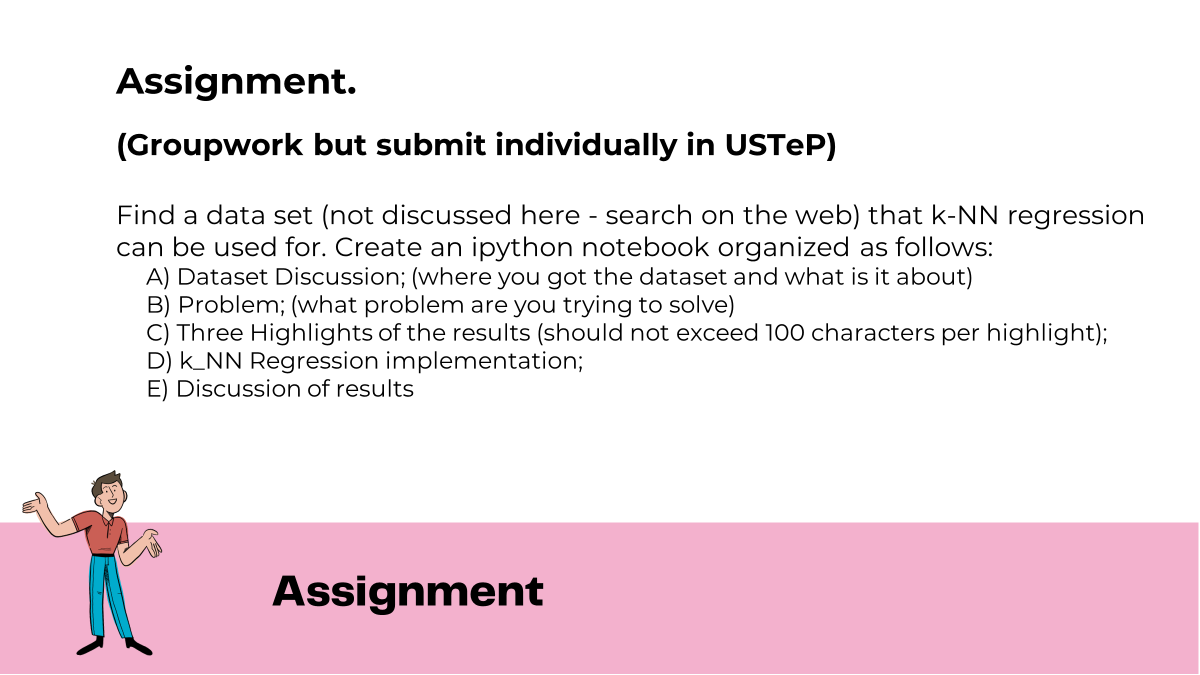

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import plotly.express as px
from sklearn.model_selection import cross_val_score

# Dataset Discussion
A dataset is required to predict gold price. We can obtain a reference for predicting gold price by using the Kaggle dataset.

The dataset figures the price of crude oil, interest rates (repo rates), Indian currency prices in dollars, the Sensex, inflation rate, and the US Dollar index will all have a direct or indirect relationship with the price of gold.

In [2]:
df = pd.read_csv('../input/gold-forecasting/GoldUP.csv')
df.head()

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           239 non-null    datetime64[ns]
 1   Gold_Price     239 non-null    int64         
 2   Crude_Oil      239 non-null    float64       
 3   Interest_Rate  239 non-null    float64       
 4   USD_INR        239 non-null    float64       
 5   Sensex         239 non-null    float64       
 6   CPI            239 non-null    float64       
 7   USD_Index      239 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 15.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gold_Price,239.0,19299.062762,11668.913490,4267.000000,6712.500000,19056.000000,29364.00000,52917.000000
Crude_Oil,239.0,3397.686318,1551.627401,887.420000,2180.695000,3303.550000,4492.93000,6926.830000
Interest_Rate,239.0,6.715900,1.188309,4.250000,6.000000,6.000000,7.00000,10.250000
USD_INR,239.0,53.804819,10.311144,39.366685,45.467395,48.664774,63.86103,76.222334
Sensex,239.0,18172.443891,11032.206600,2811.600000,8263.400000,17464.810000,26662.39500,41253.740000
CPI,239.0,73.372050,29.106141,36.730000,45.190000,68.470000,101.37000,129.300000
USD_Index,239.0,90.182510,11.312607,71.800000,81.110000,88.940000,97.16000,120.240000


In [5]:
df.isnull().sum()

Date             0
Gold_Price       0
Crude_Oil        0
Interest_Rate    0
USD_INR          0
Sensex           0
CPI              0
USD_Index        0
dtype: int64

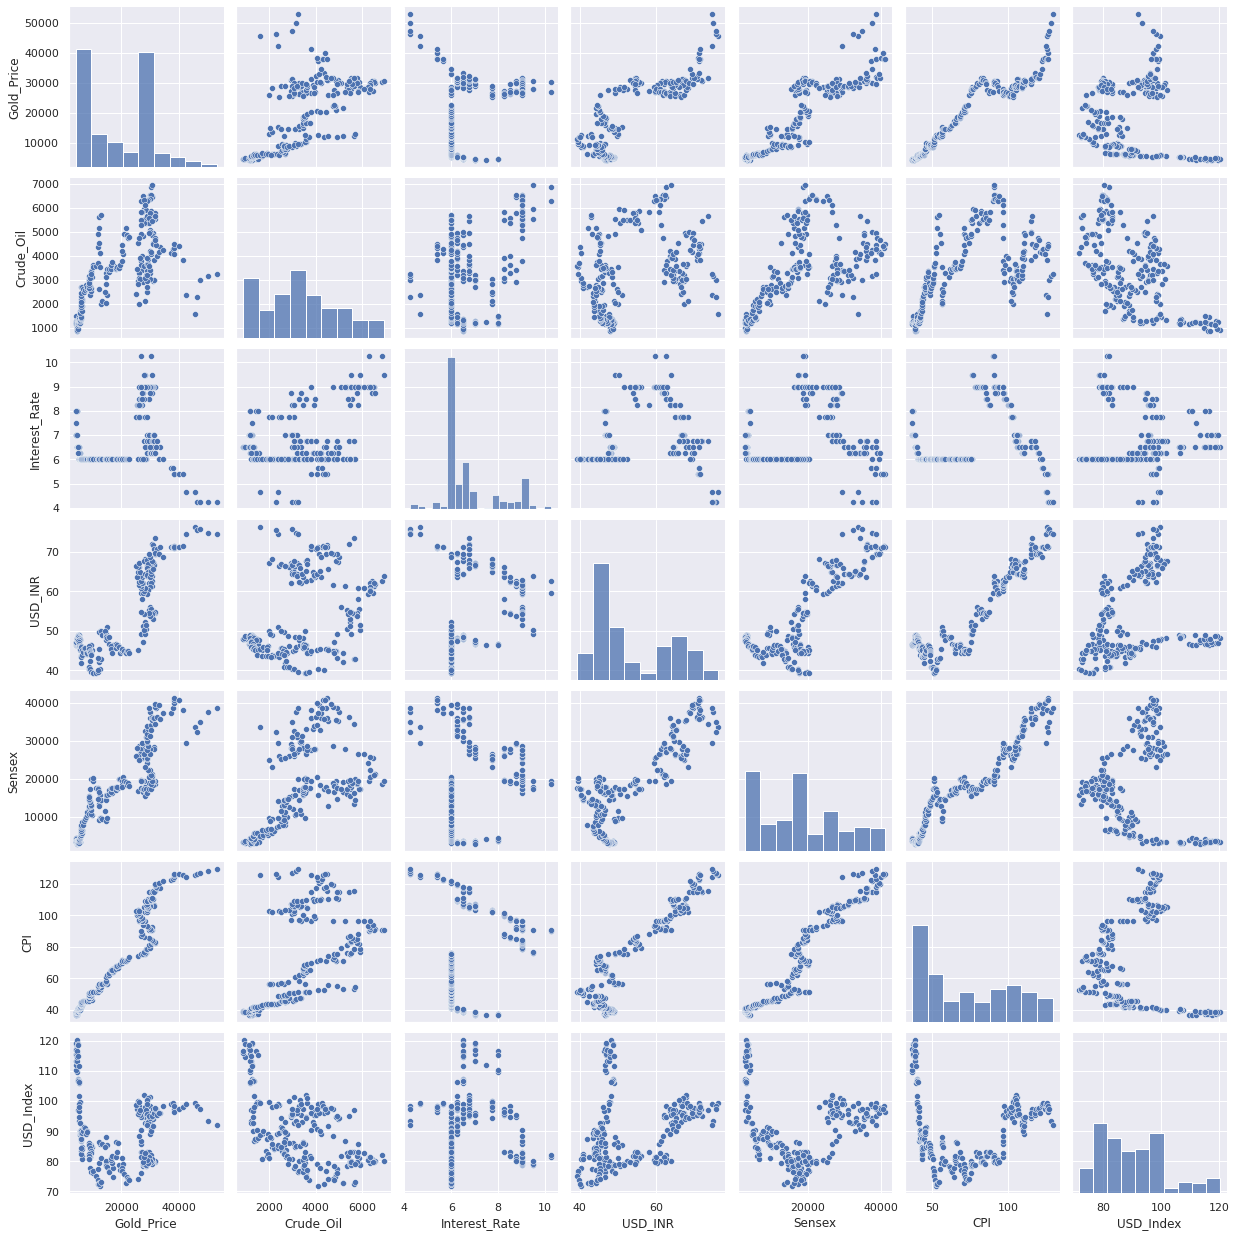

In [6]:
sns.set(rc={'figure.figsize':(9,6)})
sns.pairplot(df);

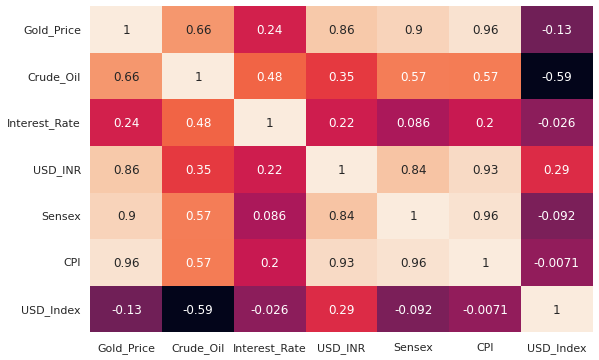

In [7]:
sns.heatmap(df.corr(), cbar=False, annot=True);

<a id='prices'></a>

In [8]:
price = px.line(data_frame=df, x=df['Date'], y=df[['Crude_Oil','Gold_Price','CPI']].columns)
price.update_layout(showlegend=True, 
                    hovermode="x", 
                    title="Price of Gold and Crude Oil", 
                    legend_title="Product", 
                    yaxis_title="Price")
price.update_traces(mode="markers+lines", hovertemplate=None)
price.show()

The annual gold prices are represented in red. The diagram implies that the series is on an increasing trend with a random walk. The last graph shows that the series is mean reverting, which means that after differencing, the series remains stationary. It also applies to crude oil, as the price of crude oil has been nearly constant over the years.

In [9]:
scatter = px.scatter(data_frame=df, x='Gold_Price', y='Crude_Oil')
scatter.update_layout(title=f"Correlation: {df[['Gold_Price','Crude_Oil']].corr().iloc[1,0]}")
scatter.show();

# Problem
___
The main problem is to predict the prices of gold with the use of the prices of crude oils,interest rates,Indian currency prices in dollars, the Sensex,inflation rate, and the US Dolkar index. Using these important features, we can predict our floating target.

# Three Highlights of the Results
___
1. The optimal value of the regression model is `8`, this will be used to have better predictions.
2. Gold price and CPI are the most correlated features.
3. Both training and testing follows a linear decline as the value of k in neighbors increases.

# kNN Regression Implementation

In [10]:
X = df.drop('Gold_Price', axis=1).values
y = df['Gold_Price'].values

In [11]:
print(X[0])
print(y[0])

[Timestamp('2000-01-10 00:00:00') 1455.51 8.0 46.318297 3711.02 37.23
 116.65]
4538


In [12]:
print(X.shape) # The timestamp will be removed, model can't recognize it
print(y.shape)

(239, 7)
(239,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X[:,1:], y, test_size=0.25, random_state=0)
neighbors = range(1,51)
train = []
test = []

for n in neighbors:
    reg = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    train.append(reg.score(X_train, y_train))
    test.append(reg.score(X_test, y_test))

print(f'Optimal Value of K is {test.index(max(test))+1}')
print(f'With the R Squared score of {max(test)}')

Optimal Value of K is 8
With the R Squared score of 0.9317145942245755


<a id='optimal'></a>

In [14]:
labels = ['Train Score', 'Test Score']
scores = px.line(x=neighbors, y=[train, test])
scores.update_layout(showlegend=True, 
                     hovermode="x",
                     title="R Squared Score per N-Neighbor",
                     legend_title="Score",
                     yaxis_title="R Squared Score",
                     xaxis_title="N-Neighbors")
scores.update_traces(mode="markers+lines", hovertemplate=None)

for idx, name in enumerate(labels):
    scores.data[idx].name = name
scores.show();

## Prediction

In [15]:
model = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.9317145942245755

<a id='pred'></a>

In [16]:
l = ["Actual Values","Predicted Values"]
predict = px.scatter(x=X_test[:,4], y=[y_test, y_pred])
predict.update_layout(showlegend=True, 
                      hovermode="x",
                      title="Predicted and Actual Values",
                      legend_title=None,
                      yaxis_title="Price",
                      xaxis_title="Consumer Price Index")

for idx, name in enumerate(l):
    predict.data[idx].name = name
predict.show();

The disparity between the actual and expected values of the gold price and its sensex is depicted in this scatter plot.

# Discussion of Results

* Dataset <br>
The dataset was retrieved from kaggle, the most common approach for this dataset is the time series and forecasting. The dataset is fortunately clean and is ready for the learning procedure. The correlations between features are also good, it was shown in the heatmap above. The data depicted [here](#prices) has some odd points that are being repeated along the x axis, but if you zoom it in with plotly's zoom features, you can see the trends that can't be seen in the bigger picture. The reason behind it is that, the data only contains information in the month of January. <br>
<br>
* Optimal Value of K <br>
The optimal value of k can be seen in this [graph](#optimal), for the training data, the optimal value of k is `1` or `100%`, and for the test data, the optimal value of k is `8` which gained `93.17%` R squared score. <br>
<br>
* Prediction <br>
During prediction, we decided to prioritize the optimal value of the test set, because it's the most practical to use, in this [scatter plot](#pred), we can see the predicted and the actual values, predicted values are being obtained using the parameter `KNeighborsRegressor(n_neighbors=8)` because it has the highest R squared score among the 50 neighbors that we tested.